In [ ]:
#@title Importing Packages

# Utility
import math as math
import numpy as np
import pandas as pd
import random as rdm
import scipy.io as io
import scipy.stats as stats
from google.colab import drive
import networkx as nx
import time

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.animation import FuncAnimation
from functools import partial
import matplotlib.patches as patch

# Plotting functions

In [ ]:
#@title Function to plot results

def plotResults(results, sites, length, name, y):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(name, fontsize = 20)
    fig.text(0.5, 0.08, "Time", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.08, 0.5, y, ha = 'center', va = 'center', rotation = 90, fontsize = 15)
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, sites)))

    plt.xlim(0, length)
    siteArray = []

    for i in range(sites):
        site, = plt.plot(range(length), results[i, :], label = f"{i + 1}")
        siteArray.append(site)
    
    legend = fig.legend(handles = siteArray, loc = 'upper center', borderpad = 0.2, facecolor = 'k', edgecolor = 'w', ncol = sites)
    for text in legend.get_texts():
        plt.setp(text, color = 'w')

    plt.show()

## Prior PDF/PMF

In [ ]:
#@title Function to plot pdf of distribution for single parameter

def plotPDF(dist, mean, true, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"PDF of {name} prior", fontsize = 20)
    fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Density", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    sample = dist.rvs(10000)
    plt.hist(sample, bins = 100, alpha = 0.5, color = 'lightblue')

    points = []

    plt.scatter(true, 10, marker = '+', alpha = 0.8, s = 10, facecolor = 'g')
    plt.scatter(mean, 10, marker = 'D', alpha = 0.8, s = 10, facecolor = 'r')

    patch1 = plt.scatter(0, 0, facecolor = 'g', marker = 'D')
    patch2 = plt.scatter(0, 0, facecolor = 'r', marker = '+')
    patches = [patch1, patch2]
    patch1.remove()
    patch2.remove()

      
    legend = fig.legend(handles = patches,
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend.get_texts():
        plt.setp(text, color = 'w')

    plt.show()


In [ ]:
#@title Function to plot pdf of distribution for set of parameters

def plotPDFSet(dist, mean, true, N, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"PDF of {name} prior", fontsize = 20)
    fig.text(0.5, 0.05, "Density", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))

    sample = dist.rvs(10000)
    plt.hist(sample, alpha = 0.5, bins = 100, color = 'lightblue')

    points = []

    for i in range(N):
        plt.scatter(mean[i], 10, alpha = 0.8, s = 10, marker = '+')
    for i in range(N):
        plt.scatter(true[i], 10, alpha = 0.8, s = 10, marker = 'D')
    for i in range(N):
        point = plt.scatter(0, 0, edgecolor = 'k', label = f"{i + 1}")
        points.append(point)
        point.remove()


    patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
    patch2 = plt.scatter(0, 0, color= 'w', marker = '+')
    patches = [patch1, patch2]
    patch1.remove()
    patch2.remove()

      
    legend1 = fig.legend(handles = patches,
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')

    legend2 = fig.legend(handles = points, loc = 'upper center', ncol = N, borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend1.get_texts():
        plt.setp(text, color = 'w')

    for text in legend2.get_texts():
        plt.setp(text, color = 'w')

    plt.show()


In [ ]:
#@title Function to plot pmf of distribution for set of parameters

def plotPMFSet(dist, mean, true, N, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"PMF of {name} prior", fontsize = 20)
    fig.text(0.5, 0.05, "Density", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))

    sample = dist.rvs(10000)
    plt.hist(sample, alpha = 0.5, color = 'tab:blue')

    points = []

    for i in range(N):
        plt.scatter(mean[i], 10, alpha = 0.8, s = 10, marker = '+')
    for i in range(N):
        plt.scatter(true[i], 10, alpha = 0.8, s = 10, marker = 'D')
    for i in range(N):
        point = plt.scatter(0, 0, edgecolor = 'k', label = f"{i + 1}")
        points.append(point)
        point.remove()


    patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
    patch2 = plt.scatter(0, 0, color = 'w', marker = '+')
    patches = [patch1, patch2]
    patch1.remove()
    patch2.remove()

      
    legend1 = fig.legend(handles = patches,
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend1.get_texts():
        plt.setp(text, color = 'w')

    legend2 = fig.legend(handles = points, loc = 'upper center', ncol = N, borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend2.get_texts():
        plt.setp(text, color = 'w')

    plt.show()


## Walk of value

In [ ]:
#@title function to plot walk of single parameter

def plotWalk(sample, true, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"Walk of {name}", fontsize = 20)
    fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    plt.xlim(0, len(sample))
    plt.plot(range(len(sample)), sample, label = "Predicted Value", c = 'lightblue')
    plt.plot([0, len(sample)], [true, true], '--', label = 'True value', c = 'tab:orange')

    legend = fig.legend(handles = [plt.Line2D([0,1], [0,1], linestyle = '--', color = 'tab:orange'), 
                        plt.Line2D([0,1], [0,1], color = 'lightblue')], 
                        labels = ['True Value', 'Predicted Value'],
                        bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                        facecolor = 'k', edgecolor = 'w')
    
    for text in legend.get_texts():
        plt.setp(text, color = 'w')

    plt.show()

In [ ]:
#@title function to plot walk of set of parameters

def plotWalkSet(sample, true, N, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of {name}", fontsize = 20)

  plt.xlim(0, len(sample[:, 0]))
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))
  trueLines = []

  for i in range(N):
    predLine, = plt.plot(range(len(sample[:, i])), sample[:, i], alpha = 0.5)
    
  for i in range(N):  
    trueLine, = plt.plot([0, len(sample[:, i])], [true[i], true[i]], '--')
    trueLines.append(trueLine)
    
  
  legend1 = fig.legend(handles = trueLines, labels = range(1, N + 1), loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = [plt.Line2D([0,1], [0,1], linestyle = '--', color = 'w'), 
                      plt.Line2D([0,1], [0,1], color = 'w')], 
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

## Walk of likelihood

In [ ]:
#@title function to plot likelihood walk

def plotLikelihood(likelihood, sites, length, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of Likelihood of {name}", fontsize = 20)
  
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  likelihoodLine, = plt.plot(range(len(likelihood[:])), np.e**(likelihood[:]/(sites*length)), '--', c = 'lightblue')
  
  plt.show()

# Walk of DIC

In [ ]:
#@title Function to plot walk of IC

def plotDIC(dic, sites, length, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of DIC of {name}", fontsize = 20)
  
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "DIC", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  likelihoodLine, = plt.plot(range(len(dic[:])), dic[:], '--', c = 'lightblue')
  
  plt.show()

## Histogram

In [ ]:
#@title Function to plot histogram for single parameter

def plotHist(sample, true, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Histogram of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Frequency", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  plt.hist(sample, color = 'lightblue', alpha = 0.5, bins = 100)
  patch1 = plt.scatter(np.mean(sample), 10, alpha = 0.8, s = 10, marker = '+', c = 'g', label = 'True value')
  patch2 = plt.scatter(true, 10, alpha = 0.8, s = 10, marker = 'D', c = 'r', label = 'Predicted Value')
  patches = [patch1, patch2]

    
  legend = fig.legend(handles = patches,
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

In [ ]:
#@title Function to plot histogram for set of parameters

def plotHistSet(sample, true, N, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Histogram of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Frequency", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))

  hists = []
  rectBoxes = []

  for i in range(N):
      hist = plt.hist(sample[:, i], bins = 100, alpha = 0.5)
      hists.append(hist[2].__getitem__(1).get_facecolor())

  for i in range(N):
      plt.scatter(np.mean(sample[:, i]), 10, alpha = 0.8, s = 10, marker = '+')

  for i in range(N):
      plt.scatter(true[i], 10, alpha = 0.8, s = 10, marker = 'D')

  for i in range(N):
      rect = patch.Patch(label = f"{i + 1}", facecolor = hists[i], edgecolor = 'w')
      rectBoxes.append(rect)

  patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
  patch2 = plt.scatter(0, 0, color='w', marker = '+')
  patches = [patch1, patch2]
  patch1.remove()
  patch2.remove()

  legend1 = fig.legend(handles = rectBoxes, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')

  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = patches,
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show() 

In [ ]:
#@title Function to plot barplot for set of parameters

def plotHistSetDiscrete(sample, true, N, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Histogram of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Frequency", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))

  hists = []
  rectBoxes = []

  for i in range(N):
      barplotDF = pd.DataFrame(columns = ['Count'], index = np.unique(sample[:, i]))
      for j in barplotDF.index:
          barplotDF.loc[j]['Count'] = sum([1 for x in sample[:, i] if x == j])

      hist = plt.bar(barplotDF.index, barplotDF['Count'], alpha = 0.5)
      hists.append(hist[0].get_facecolor())

  for i in range(N):
      plt.scatter(np.mean(sample[:, i]), 10, alpha = 0.8, s = 10, marker = '+')

  for i in range(N):
      plt.scatter(true[i], 10, alpha = 0.8, s = 10, marker = 'D')

  for i in range(N):
      rect = patch.Patch(label = f"{i + 1}", facecolor = hists[i], edgecolor = 'w')
      rectBoxes.append(rect)

  patch1 = plt.scatter(0, 0, color = 'w', marker = 'D')
  patch2 = plt.scatter(0, 0, color='w', marker = '+')
  patches = [patch1, patch2]
  patch1.remove()
  patch2.remove()

  legend1 = fig.legend(handles = rectBoxes, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')

  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = patches,
                      labels = ['True Value', 'Predicted Value'],
                      bbox_to_anchor = (0.825, 0.1), borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show() 

## Scatterplot of likelihood

In [ ]:
#@title Function to plot scatterplot of likelihood for single parameter
def plotScatterLikelihood(sample, likelihood, sites, length, true, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Scatterplot of Likelihood of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)


  plt.scatter(sample, np.e**(likelihood/(sites*length)), alpha = 0.1, c = 'lightblue')

  point0 = plt.scatter(0, 0, c = 'lightblue')
  point1 = plt.scatter(true, 0, marker = 'D', s = 10, facecolor = 'r')
  point2 = plt.scatter(np.mean(sample), 0, s = 10, marker = '+', facecolor = 'g')
  points = [point0, point1, point2]
  point0.remove()

  legend = fig.legend(handles = points,
                    labels = ['Likelihood values', 'True Value', 'Predicted Value'],
                    bbox_to_anchor = (0.875, 0.1), borderpad = 0.2, 
                    facecolor = 'k', edgecolor = 'w', ncol = 2)

  for text in legend.get_texts():
        plt.setp(text, color = 'w')

In [ ]:
#@title Function to plot scatterplot of likelihood for set of parameters
def plotScatterLikelihoodSet(sample, likelihood, sites, length, true, N, name):

  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Scatterplot of Likelihood of {name}", fontsize = 20)
  fig.text(0.5, 0.05, "Value", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Likelihood", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

  plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))
  values = []

  for i in range(N):
      plt.scatter(sample, np.e**(likelihood/(sites*length)), alpha = 0.05)
  for i in range(N):
      plt.scatter(true[i], 0, marker = 'D', s = 10, edgecolor = 'k')
  for i in range(N):
      plt.scatter(np.mean(sample[:, i]), 0, s = 10, marker = '+', edgecolor = 'k')
  for i in range(N):
      point = plt.scatter(0, 0, edgecolor = 'k', label = f"{i + 1}")
      values.append(point)

  point0 = plt.scatter(0, 0, edgecolor = 'w', c = 'w')
  point1 = plt.scatter(0, 0, marker = 'D', edgecolor = 'w', facecolor = 'w')
  point2 = plt.scatter(0, 0, marker = '+', edgecolor = 'w', facecolor = 'w')
  points = [point0, point1, point2]
  point0.remove()
  point1.remove()
  point2.remove()

  legend1 = fig.legend(handles = values, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend1.get_texts():
        plt.setp(text, color = 'w')

  legend2 = fig.legend(handles = points,
                    labels = ['Likelihood values', 'True Value', 'Predicted Value'],
                    bbox_to_anchor = (0.875, 0.1), borderpad = 0.2, 
                    facecolor = 'k', edgecolor = 'w', ncol = 2)
  
  for text in legend2.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

## Walk of Accept ratio

In [ ]:
#@title Function to plot Walk of Accept Ratio for single parameter

def plotAcceptRatio(sample, name):
    fig, ax = plt.subplots(figsize = (10, 5), facecolor = "xkcd:grey")
    ax.set_facecolor('k')
    plt.grid('on')

    plt.title(f"Walk of Accept Ratio for {name}", fontsize = 20)
    fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
    fig.text(0.05, 0.5, "Ratio", ha = 'center', va = 'center', rotation = 90, fontsize = 15)

    plt.xlim(0, len(sample))
    plt.ylim(0, 1)
    plt.plot(range(len(sample)), sample, label = "Predicted Value", c = 'lightblue')

    plt.show()

In [ ]:
#@title Function to plot Walk of Accept Ratio for set of parameters


def plotAcceptRatioSet(sample, N, name):
  fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'xkcd:grey')
  ax.set_facecolor('k')
  plt.grid('on')

  plt.title(f"Walk of Accept Ratio for {name}", fontsize = 20)
  plt.xlim(0, len(sample[:, 0]))
  fig.text(0.5, 0.05, "Iteration", ha = 'center', va = 'center', fontsize = 15)
  fig.text(0.05, 0.5, "Value", ha = 'center', va = 'center', rotation = 90, fontsize = 15)
  plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, N)))
  
  plt.xlim(0, len(sample))
  plt.ylim(0, 1)
  predLines = []

  for i in range(N):
    predLine, = plt.plot(range(len(sample[:, i])), sample[:, i], alpha = 0.5, label = f"{i + 1}")
    predLines.append(predLine)

  legend = fig.legend(handles = predLines, loc = 'upper center', ncol = N, borderpad = 0.2, 
                      facecolor = 'k', edgecolor = 'w')
  
  for text in legend.get_texts():
        plt.setp(text, color = 'w')
  
  plt.show()

# Toy example for algae bloom

In [ ]:
#@title Importing pmat

drive.mount('drive')

pmatRaw = pd.read_csv("https://drive.google.com/uc?export=download&id=18qzQ-2TRETglAGLSXRZekyQqK7QxXUff")
pmat = pmatRaw.copy()
pmat = pmat.set_index('Unnamed: 0')

Mounted at drive


In [ ]:
#@title Calculates Mit based upon parameters and Mi(t - 1)

def findMNew(M, t, A, Alpha, Beta, S, pmat):

  start = S
  growth = Alpha*(A*M)
  transport = Beta*np.dot(M, pmat)

  MNew = start + growth + transport

  return MNew

In [ ]:
#@title generates sample with randomly generated parameter
def runSimulation(sites, length, pmat):

    Alpha = stats.gamma(2, scale = 1).rvs()
    Beta = stats.beta(4, 3).rvs()

    # Forcing N = 1 for MH purposes
    #N = 1
    N =  stats.randint(1, int(length/10)).rvs()
    A = np.zeros((length, sites))
    S = np.zeros((length, sites))

    IArray = []
    TArray = []
    WArray = []
    SArray = []

    for n in range(N):
        i = stats.randint(0, sites - 1).rvs()
        IArray.append(i)
        T = stats.randint(1, length - 1).rvs()
        TArray.append(T)
        W = int(stats.nbinom.rvs(6, 0.75)) + 1
        WArray.append(W)

        A[range(T, (min(T + W, length))), i] = 1
        Size = stats.gamma(1, scale = 1).rvs()
        S[T, i] = Size
        SArray.append(Size)

    M = np.zeros(sites)
    MArray = np.zeros((sites, length))

    #print(f"Alpha: {Alpha}")
    #print(f"Beta: {Beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    pDiag = [pmat.iloc[i, i] for i in range(sites)]

    for t in range(length):

        M = findMNew(M, t, A[t, :], Alpha, Beta, S[t, :], np.array(pmat.iloc[:sites, :sites]))
        MArray[:, t] = M

    return MArray, Alpha, Beta, N, IArray, TArray, WArray, SArray

In [ ]:
#@title Runs simulation with given parameters

def getSample(sites, length, pmat, alpha, beta, N, I, T, W, Size):

    if (len(T) != N) or (len(W) != N) or (len(Size) != N) or (len(I) != N):
        print(N)
        print(len(T), len(W), len(Size))
        print("Error: Wrong length parameter vectors")
        return

    A = np.zeros((length, sites))
    S = np.zeros((length, sites))
    
    for n in range(N):
        A[range(T[n], (min(T[n] + W[n], length))), I[n]] = 1
        S[T[n], I[n]] = Size[n]

    M = np.zeros(sites)
    MArray = np.zeros((sites, length))
    #print(f"Alpha: {alpha}")
    #print(f"Beta: {beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    for t in range(length):

        M = findMNew(M, t, A[t, :], alpha, beta, S[t, :], np.array(pmat.iloc[:sites, :sites]))
        MArray[:, t] = M

    return MArray

In [ ]:
#@title Function to convert mass into concentration

def convertConcentration(sites, length, M, V, delta):

    C = np.zeros((sites, length))
    for i in range(sites):
        C[i, :] = M[i, :]/V[i]
    if C.any() < 0:
        print("Negative Concentration")
    LogCArray = np.log(delta + C)

    return LogCArray

In [ ]:
#@title Converting Concentration to Y

def convertY(C, tau):

    LogYArray = stats.norm(C, 1/np.sqrt(tau)).rvs()
    
    return LogYArray

Parameters known:
- t = length of time
- i = number of sites
- delta = dummy parameter to ensure log(delta + Mit/Vit) works
- V = (i x 1) vector of Volumes per site
---
Parameters to be estimated:
- Alpha = growth parameter
- Beta = decay parameter
- N = Number of events
- I = (n x 1) Vector of sites per event
- S = (i x t) Vector of Size Parameters
- A = (i x t) Vector of activation time
- T = (n x 1) vector of Start time parameters
- W = (n x 1) vector of Length of time parameters
- Epsilon = Error parameter

In [ ]:
def generateObservationArrayRandom(sites, length, p):

    OArray = np.ones((sites, length))
    for i in range(sites):
      u = stats.uniform(0, 1).rvs(length)
      for j in range(length):
        if p > u[j]:
          OArray[i, j] = np.NaN
    
    return OArray

In [ ]:
def generateObservationArraySites(sites, length, missingSites):

    OArray = np.ones((sites, length))
    for i in missingSites:
        OArray[i, :] = np.NaN

    return OArray

## MH sampler with unknown T

In [ ]:
#@title MH sampler - Not even close

sites = 10
length = 100
delta = 0.0000000001
trueTau = stats.gamma(1, scale = 1).rvs()
V = stats.nbinom(1, .1).rvs(sites) + 1
seed = stats.randint(1, 100).rvs()

sample, trueAlpha, trueBeta, trueN, trueI, trueT, trueW, trueS = runSimulation(sites, length, pmat)

CArray = convertConcentration(sites, length, sample, V, delta)
Y = convertY(CArray, trueTau)

OArray = generateObservationArrayRandom(sites, length, 0.2)
sampleObserved = sample*OArray
CArrayObserved = CArray*OArray
YObserved = Y*OArray

# Prior parameters

  # Alpha
alphaA0 = 2
alphaB0 = 1
alphaPrior = stats.gamma(alphaA0, scale = 1/alphaB0)
alpha0 = alphaPrior.rvs()

  # Beta
betaA0 = 1
betaB0 = 1
betaPrior = stats.beta(betaA0, betaB0)
beta0 = betaPrior.rvs()

  # N
NA0 = 0.1
NPrior = stats.geom(NA0)
N0 = trueN
# N0 = int(NPrior.rvs())

  # I
IA0 = 0
IB0 = sites
IPrior = stats.randint(IA0, IB0)
I0 = IPrior.rvs(N0)

  # T
TA0 = 0
TB0 = length
TPrior = stats.randint(TA0, TB0)
T0 = TPrior.rvs(N0)

  # W
WA0 = 6
WB0 = 0.75
WPrior = stats.nbinom(WA0, WB0)
W0 = WPrior.rvs(N0)

  # S
SA0 = 1
SB0 = 1
SPrior = stats.gamma(SA0, scale = 1/SB0)
# S0 = [SPrior.rvs()]
S0 = SPrior.rvs(N0)

  # Tau
tauA0 = 1
tauB0 = 1
tauPrior = stats.gamma(tauA0, scale = 1/tauB0)
tau0 = tauPrior.rvs()

phi = [alpha0, beta0, N0, I0, T0, W0, S0, tau0]
S = 10000
PHI = dict.fromkeys(range(S))
PHI[0] = phi

alphaArray = np.zeros((S,))
betaArray = np.zeros((S,))
IArray = np.zeros((S, N0))
TArray = np.zeros((S, N0))
WArray = np.zeros((S, N0))
SArray = np.zeros((S, N0))
tauArray = np.zeros((S,))

alphaLikelihoodArray = np.zeros((S - 1,))
betaLikelihoodArray = np.zeros((S - 1,))
ILikelihoodArray = np.zeros((S - 1, N0))
TLikelihoodArray = np.zeros((S - 1, N0))
WLikelihoodArray = np.zeros((S - 1, N0))
SLikelihoodArray = np.zeros((S - 1, N0))
tauLikelihoodArray = np.zeros((S - 1,))

likelihoodFullArray = np.zeros((S - 1,))
likelihoodObservedArray = np.zeros((S - 1,))

devianceFullArray = np.zeros((S - 1,))
DICFullArray = np.zeros((S - 1,))

devianceObservedArray = np.zeros((S - 1,))
DICObservedArray = np.zeros((S - 1,))

alphaRatioArray = np.zeros((S - 1,))
betaRatioArray = np.zeros((S - 1,))
IRatioArray = np.zeros((S - 1, N0))
TRatioArray = np.zeros((S - 1, N0))
WRatioArray = np.zeros((S - 1, N0))
SRatioArray = np.zeros((S - 1, N0))
tauRatioArray = np.zeros((S - 1,))

alphaArray[0] = alpha0
betaArray[0] = beta0
IArray[0, :] = I0
TArray[0, :] = T0
WArray[0, :] = W0
SArray[0, :] = S0
tauArray[0] = tau0

alphaAccept = 0
betaAccept = 0
IAccept = 0
TAccept = 0
WAccept = 0
SAccept = 0
tauAccept = 0

start = time.time()
for s in range(1, S):
  # Alpha
    # Grabbing candidate alpha
    qDistAlpha = stats.norm(phi[0], 4)
    alphaCandidate = qDistAlpha.rvs()
    qDistAlphaCandidate = stats.norm(alphaCandidate, 4)

    # Calculating mass and concentrations
    massSampleCandidate = getSample(sites, length, pmat, alphaCandidate, phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
    concSampleCandidateObserved = concSampleCandidate*OArray

    massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
    concSampleCurrentObserved = concSampleCurrent*OArray

    # Calculating probability
        # Prior
    priorCandidateP = alphaPrior.logpdf(alphaCandidate)
    priorCurrentP = alphaPrior.logpdf(phi[0])

        # Likelihood
    pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
    pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

    likelihoodCandidateP = np.nansum(pArrayCandidate)
    likelihoodCurrentP = np.nansum(pArrayCurrent)

        # Proposal
    qCandidate = qDistAlpha.logpdf(alphaCandidate)
    qCurrent = qDistAlphaCandidate.logpdf(phi[0])

    ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
    alphaRatioArray[s - 1] = ratio

    # Accept/Reject Alpha
    u = np.log(stats.uniform().rvs())
    if ratio >= u:
        print("Accepted Alpha: ", s)
        phi[0] = alphaCandidate
        alphaAccept += 1
        alphaLikelihoodArray[s - 1] = likelihoodCandidateP
    else:
        alphaLikelihoodArray[s - 1] = likelihoodCurrentP

    alphaArray[s] = phi[0]


  # Beta
    # Grabbing candidate beta
    qDistBeta = stats.beta(1, 1)
    betaCandidate = qDistBeta.rvs()
    qDistBetaCandidate = stats.beta(1, 1)

    # Calculating mass and concentrations
    massSampleCandidate = getSample(sites, length, pmat, phi[0], betaCandidate, phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
    concSampleCandidateObserved = concSampleCandidate*OArray

    massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
    concSampleCurrentObserved = concSampleCurrent*OArray

    # Calculating probability
        # Prior
    priorCandidateP = betaPrior.logpdf(betaCandidate)
    priorCurrentP = betaPrior.logpdf(phi[1])

        # Likelihood
    pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
    pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

    likelihoodCandidateP = np.nansum(pArrayCandidate)
    likelihoodCurrentP = np.nansum(pArrayCurrent)

        # Proposal
    qCandidate = qDistBeta.logpdf(betaCandidate)
    qCurrent = qDistBetaCandidate.logpdf(phi[1])

    #print(pCandidate, pPrior)
    ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
    betaRatioArray[s - 1] = ratio

    # Accept/Reject Beta
    u = np.log(stats.uniform().rvs())
    if ratio >= u:
        print("Accepted Beta: ", s)
        phi[1] = betaCandidate
        betaAccept += 1
        betaLikelihoodArray[s - 1] = likelihoodCandidateP
    else:
        betaLikelihoodArray[s - 1] = likelihoodCurrentP

    betaArray[s] = phi[1]

    # I
    for site in range(phi[2]):
        # Grabbing candidate Ii
        qDistI = stats.randint(0, sites)
        iCandidate = qDistI.rvs()
        ICandidate = phi[3].copy()
        ICandidate[site] = iCandidate

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], ICandidate, phi[4], phi[5], phi[6])
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleCandidateObserved = concSampleCandidate*OArray

        massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        concSampleCurrentObserved = concSampleCurrent*OArray

        # Calculating probability
            # Prior
        priorCandidateP = IPrior.logpmf(iCandidate)
        priorCurrentP = IPrior.logpmf(phi[3][site])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

        likelihoodCandidateP = np.nansum(pArrayCandidate)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

        pCandidate = priorCandidateP*likelihoodCandidateP
        pPrior = priorCurrentP*likelihoodCurrentP

            # Proposal
        qCandidate = qDistI.logpmf(iCandidate)
        qCurrent = qDistI.logpmf(phi[3][site])

        #print(pCandidate, pPrior)
        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        IRatioArray[s - 1, site] = ratio

        # Accept/Reject I
        u = np.log(stats.uniform().rvs())
        if ratio >= u:
            print(f"Accepted I{site}: ", s)
            phi[3] = ICandidate
            IAccept += 1/phi[2]
            ILikelihoodArray[s - 1, site] = likelihoodCandidateP
        else:
            ILikelihoodArray[s - 1, site] = likelihoodCurrentP

    IArray[s, :] = phi[3]

    # T
    for t in range(phi[2]):
        # Grabbing candidate Ti
        qDistT = stats.randint(0, length)
        tCandidate = qDistT.rvs()
        TCandidate = phi[4].copy()
        TCandidate[t] = tCandidate
        qDisttCandidate = stats.randint(0, length)

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], TCandidate, phi[5], phi[6])
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleCandidateObserved = concSampleCandidate*OArray

        massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        concSampleCurrentObserved = concSampleCurrent*OArray

        # Calculating probability
            # Prior
        priorCandidateP = TPrior.logpmf(tCandidate)
        priorCurrentP = TPrior.logpmf(phi[4][t])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

        likelihoodCandidateP = np.nansum(pArrayCandidate)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

        pCandidate = priorCandidateP*likelihoodCandidateP
        pCurrent = priorCurrentP*likelihoodCurrentP

            # Proposal
        qCandidate = qDistT.logpmf(tCandidate)
        qCurrent = qDisttCandidate.logpmf(phi[4][t])

        #print(pCandidate, pPrior)
        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        TRatioArray[s - 1, t] = ratio

        # Accept/Reject T
        u = np.log(stats.uniform().rvs())

        if ratio >= u:
            print(f"Accepted T{t}: ", s)
            phi[4] = TCandidate
            TAccept += 1/phi[2]
            TLikelihoodArray[s - 1, t] = likelihoodCandidateP
        else:
            TLikelihoodArray[s - 1, t] = likelihoodCurrentP
            
    TArray[s] = phi[4]

      # W
        # Grabbing candidate W
    for w in range(phi[2]):
        qDistW = stats.binom(length, (phi[5][w] + 1)/(length + 2))
        wCandidate = qDistW.rvs()
        WCandidate = phi[5].copy()
        WCandidate[w] = wCandidate
        qDistwCandidate = stats.binom(length, (wCandidate + 1)/(length + 2))

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], WCandidate, phi[6])
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleCandidateObserved = concSampleCandidate*OArray

        massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        concSampleCurrentObserved = concSampleCurrent*OArray

        # Calculating probability
            # Prior
        priorCandidateP = WPrior.logpmf(wCandidate)
        priorCurrentP = WPrior.logpmf(phi[5][w])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

        likelihoodCandidateP = np.nansum(pArrayCandidate)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

        pCandidate = priorCandidateP*likelihoodCandidateP
        pCurrent = priorCurrentP*likelihoodCurrentP

            # Proposal
        qCandidate = qDistW.logpmf(wCandidate)
        qCurrent = qDistwCandidate.logpmf(phi[5][w])

        #print(pCandidate, pPrior)
        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        WRatioArray[s - 1, w] = ratio

        # Accept/Reject W
        u = np.log(stats.uniform().rvs())
        if ratio >= u:
            print(f"Accepted W{w}: ", s)
            phi[5] = WCandidate
            WAccept += 1/phi[2]
            WLikelihoodArray[s - 1, w] = likelihoodCandidateP
        else:
            WLikelihoodArray[s - 1, w] = likelihoodCurrentP

    WArray[s] = phi[5]

      # S
        # Grabbing candidate S
    for size in range(phi[2]):
        qDists = stats.norm(phi[6][size], .1)
        sCandidate = qDists.rvs()
        SCandidate = phi[6].copy()
        SCandidate[size] = sCandidate
        qDistsCandidate = stats.norm(sCandidate, .1)

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], SCandidate)
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
        concSampleCandidateObserved = concSampleCandidate*OArray

        massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
        concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
        concSampleCurrentObserved = concSampleCurrent*OArray

        # Calculating probability
            # Prior
        priorCandidateP = SPrior.logpdf(sCandidate)
        priorCurrentP = SPrior.logpdf(phi[6][size])

            # Likelihood
        pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
        pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

        likelihoodCandidateP = np.nansum(pArrayCandidate)
        likelihoodCurrentP = np.nansum(pArrayCurrent)

            # Proposal
        qCandidate = qDists.logpdf(sCandidate)
        qCurrent = qDistsCandidate.logpdf(phi[6][size])

        #print(pCandidate, pPrior)
        ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
        SRatioArray[s - 1, size] = ratio

        # Accept/Reject S
        u = np.log(stats.uniform().rvs())
        if ratio >= u:
            print(f"Accepted S{size}: ", s)
            phi[6] = SCandidate
            SAccept += 1/phi[2]
            SLikelihoodArray[s - 1, size] = likelihoodCandidateP
        else:
            SLikelihoodArray[s - 1, size] = likelihoodCurrentP

    SArray[s] = phi[6]

  # Tau
    # Grabbing candidate Tau
    qDistTau = stats.norm(phi[7], .5)
    tauCandidate = qDistTau.rvs()
    qDistTauCandidate = stats.norm(tauCandidate, .5)

    # Calculating mass and concentrations
    massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)
    concSampleCandidateObserved = concSampleCandidate*OArray

    massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
    concSampleCurrentObserved = concSampleCurrent*OArray

    # Calculating probability
        # Prior
    priorCandidateP = tauPrior.logpdf(tauCandidate)
    priorCurrentP = tauPrior.logpdf(phi[7])

        # Likelihood
    pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(tauCandidate)).logpdf(YObserved)
    pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)

    likelihoodCandidateP = np.nansum(pArrayCandidate)
    likelihoodCurrentP = np.nansum(pArrayCurrent)

        # Proposal
    qCandidate = qDistTau.logpdf(tauCandidate)
    qCurrent = qDistTauCandidate.logpdf(phi[7])

    #print(pCandidate, pPrior)
    ratio = (priorCandidateP - priorCurrentP) + (likelihoodCandidateP - likelihoodCurrentP) + (qCurrent - qCandidate)
    tauRatioArray[s - 1] = ratio

    # Accept/Reject tau
    u = np.log(stats.uniform().rvs())
    if ratio >= u:
        print("Accepted Tau: ", s)
        phi[7] = tauCandidate
        tauAccept += 1
        tauLikelihoodArray[s - 1] = likelihoodCandidateP
    else:
        tauLikelihoodArray[s - 1] = likelihoodCurrentP

    tauArray[s] = phi[7]

    # Likelihood
      # Calculating f(Y|phi) 
    massSampleCurrent = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6])
    concSampleCurrent = convertConcentration(sites, length, massSampleCurrent, V, delta)
    concSampleCurrentObserved = concSampleCurrent*OArray

    # Likelihood over observed
    pArrayCurrent = stats.norm(concSampleCurrentObserved, 1/np.sqrt(phi[7])).logpdf(YObserved)
    likelihoodObservedCurrent = np.nansum(pArrayCurrent)
    likelihoodObservedArray[s - 1] = likelihoodObservedCurrent

    # Likelihood over full
    pArrayCurrent = stats.norm(concSampleCurrent, 1/np.sqrt(phi[7])).logpdf(Y)
    likelihoodFullCurrent = np.nansum(pArrayCurrent)
    likelihoodFullArray[s - 1] = likelihoodFullCurrent

    # DIC
      # Calculating f(Y|Theta Hat)
    massSampleHat = getSample(sites, length, pmat, np.mean(alphaArray[:s]), np.mean(betaArray[:s]),  phi[2], 
                               [int(stats.mode(IArray[:s, i])[0]) for i in range(phi[2])],  [int(stats.mode(TArray[:s, i])[0]) for i in range(phi[2])], 
                               [int(stats.mode(WArray[:s, i])[0]) for i in range(phi[2])],  [np.mean(SArray[:, i]) for i in range(phi[2])])
    
    concSampleHat = convertConcentration(sites, length, massSampleCandidate, V, delta)
    concSampleHatObserved = concSampleHat*OArray

      # Full
    pArrayHat = stats.norm(concSampleHat, 1/np.sqrt(np.mean(tauArray[:s]))).logpdf(Y)
    likelihoodFullHat = np.nansum(pArrayHat)

      # Calculating D, DBar and DHat
    devFull = -2*likelihoodFullCurrent
    devianceFullArray[s - 1] = devFull
    devFullBar = np.mean(devianceFullArray[:s])
    devFullHat = -2*likelihoodFullHat

      # Calculating DIC
    DICFull = 2*devFullBar - devFullHat 
    DICFullArray[s - 1] = DICFull

      # Observed
    pArrayHat = stats.norm(concSampleHatObserved, 1/np.sqrt(np.mean(tauArray[:s]))).logpdf(YObserved)
    likelihoodObservedHat = np.nansum(pArrayHat)

      # Calculating D, DBar and DHat
    devObserved = -2*likelihoodObservedCurrent
    devianceObservedArray[s - 1] = devObserved
    devObservedBar = np.mean(devianceObservedArray[:s])
    devObservedHat = -2*likelihoodObservedHat

      # Calculating DIC
    DICObserved = 2*devObservedBar - devObservedHat 
    DICObservedArray[s - 1] = DICObserved
    

    newPhi = [phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], phi[7]]
    PHI[s] = newPhi
    print(f"Completed {s}")
    print("")

# Printing computing time
end = time.time()
timeDiff = int(end - start)
hours = int(np.floor(timeDiff/60**2))
timeDiff = timeDiff - hours*(60**2)
minutes = int(np.floor(timeDiff/60))
timeDiff = int(timeDiff - minutes*60)
print(f"Computing time was {hours} hours {minutes} minutes and {timeDiff} seconds")

Accepted Alpha:  1
Accepted I0:  1
Accepted I2:  1
Accepted I4:  1
Accepted I5:  1
Accepted I6:  1
Accepted T0:  1
Accepted T2:  1
Accepted W0:  1
Accepted W1:  1
Accepted W5:  1
Accepted S0:  1
Accepted S1:  1
Accepted S2:  1
Accepted S3:  1
Accepted S4:  1
Completed 1

Accepted Alpha:  2
Accepted I0:  2
Accepted I2:  2
Accepted I4:  2
Accepted I5:  2
Accepted T0:  2
Accepted T1:  2
Accepted T3:  2
Accepted T4:  2
Accepted W0:  2
Accepted W3:  2
Accepted W6:  2
Accepted S0:  2
Accepted S1:  2
Accepted S3:  2
Accepted S6:  2


<ipython-input-159-bccff371baa5>:451: RuntimeWarning: invalid value encountered in sqrt
  pArrayCandidate = stats.norm(concSampleCandidateObserved, 1/np.sqrt(tauCandidate)).logpdf(YObserved)


Completed 2

Accepted I5:  3
Accepted T0:  3
Accepted T3:  3
Accepted W5:  3
Accepted S0:  3
Accepted S1:  3
Accepted S2:  3
Accepted S3:  3
Accepted S4:  3
Accepted S5:  3
Accepted Tau:  3
Completed 3

Accepted I5:  4
Accepted W0:  4
Accepted W3:  4
Accepted S0:  4
Accepted S1:  4
Accepted S2:  4
Accepted S3:  4
Accepted S5:  4
Accepted S6:  4
Accepted Tau:  4
Completed 4

Accepted I1:  5
Accepted I4:  5
Accepted I6:  5
Accepted W0:  5
Accepted W3:  5
Accepted W6:  5
Accepted S0:  5
Accepted S2:  5
Accepted S3:  5
Accepted S4:  5
Accepted S5:  5
Accepted S6:  5
Completed 5

Accepted I1:  6
Accepted W0:  6
Accepted W2:  6
Accepted W4:  6
Accepted W6:  6
Accepted S0:  6
Accepted S1:  6
Accepted S2:  6
Accepted S3:  6
Accepted S4:  6
Accepted S5:  6
Accepted S6:  6
Accepted Tau:  6
Completed 6

Accepted Alpha:  7
Accepted I3:  7
Accepted T1:  7
Accepted T6:  7
Accepted W1:  7
Accepted W3:  7
Accepted W5:  7
Accepted S0:  7
Accepted S1:  7
Accepted S2:  7
Accepted S3:  7
Accepted S5:  7
C

<ipython-input-21-87bfbfdaeacc>:10: RuntimeWarning: invalid value encountered in log
  LogCArray = np.log(delta + C)


Streaming output truncated to the last 5000 lines.
Accepted S1:  9478
Accepted S2:  9478
Accepted S4:  9478
Accepted S5:  9478
Accepted S6:  9478
Completed 9478

Accepted I1:  9479
Accepted I5:  9479
Accepted T2:  9479
Accepted W4:  9479
Accepted S1:  9479
Accepted S2:  9479
Accepted S4:  9479
Accepted S6:  9479
Completed 9479

Accepted W1:  9480
Accepted S1:  9480
Accepted S5:  9480
Accepted S6:  9480
Completed 9480

Accepted W0:  9481
Accepted W1:  9481
Accepted W3:  9481
Accepted W4:  9481
Accepted W6:  9481
Accepted S2:  9481
Accepted S4:  9481
Accepted S6:  9481
Accepted Tau:  9481
Completed 9481

Accepted S1:  9482
Accepted S2:  9482
Accepted S4:  9482
Accepted S5:  9482
Accepted S6:  9482
Accepted Tau:  9482
Completed 9482

Accepted W0:  9483
Accepted W4:  9483
Accepted S1:  9483
Accepted S3:  9483
Accepted S5:  9483
Completed 9483

Accepted W2:  9484
Accepted S1:  9484
Accepted S4:  9484
Accepted S5:  9484
Accepted S6:  9484
Completed 9484

Accepted T2:  9485
Accepted W1:  9485

# Results

In [ ]:
#@title Printing acceptance probabilities

for (accept, name) in [(alphaAccept, 'alpha'), (betaAccept, 'beta'), (IAccept, 'I'), (TAccept, 'T'), (WAccept, 'W'), (SAccept, 'S'), (tauAccept, 'Tau')]:
    print(f"{name} Acceptance rate: {format(accept/S, '.4f')}")

alpha Acceptance rate: 0.0114
beta Acceptance rate: 0.0079
I Acceptance rate: 0.1046
T Acceptance rate: 0.0145
W Acceptance rate: 0.2726
S Acceptance rate: 0.6855
Tau Acceptance rate: 0.1009


In [ ]:
print(f"{trueAlpha}, {np.mean(alphaArray)}")

2.283954907943139, 1.3522718349643161


In [ ]:
print(f"{trueBeta}, {np.mean(betaArray)}")

0.7377943809810283, 0.7324003027088877


In [ ]:
for i in range(trueN):  
    print(trueI[i], int(stats.mode(IArray[:, i])[0]))

7 5
1 3
7 3
5 7
7 0
0 7
3 1


In [ ]:
for i in range(trueN):  
    print(trueT[i], int(stats.mode(TArray[:, i])[0]))

1 80
26 51
11 52
79 22
22 42
42 1
51 26


In [ ]:
for i in range(trueN):  
    print(trueW[i], int(stats.mode(WArray[:, i])[0]))

2 2
2 5
1 3
2 3
2 2
2 3
4 3


In [ ]:
for i in range(trueN):  
    print(trueS[i], np.mean(SArray[:, i]))

1.8162861901823149 0.1985461393150653
3.401825732975572 1.3192679395640148
0.13051170993431094 0.9850883223657149
0.19814008468809843 0.577852639235903
0.21588487178733992 1.3923514592617534
0.7175568151052903 2.0042580988876146
0.6579306587960947 1.82430955806148


In [ ]:
print(f"{trueTau}, {np.mean(tauArray)}")

0.8432880335290273, 0.7877332105056812


## Plotting results

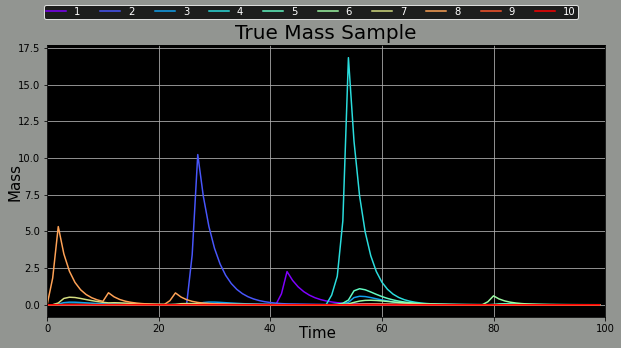

In [ ]:
#@title Plotting true mass sample
plotResults(sample, sites, length, "True Mass Sample", "Mass")

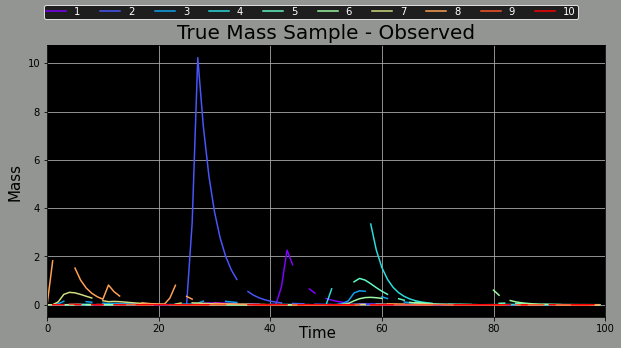

In [ ]:
plotResults(sample*OArray, sites, length, "True Mass Sample - Observed", "Mass")

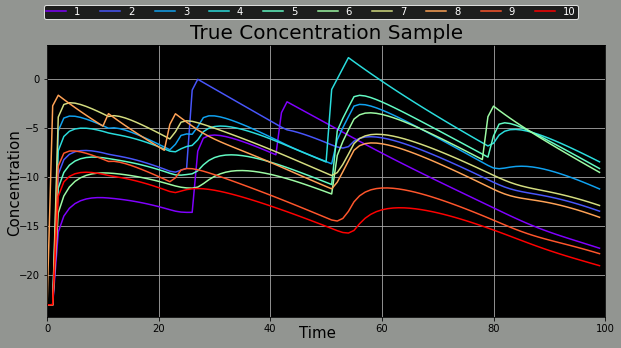

In [ ]:
#@title Plotting true C sample

plotResults(CArray, sites, length, "True Concentration Sample", "Concentration")

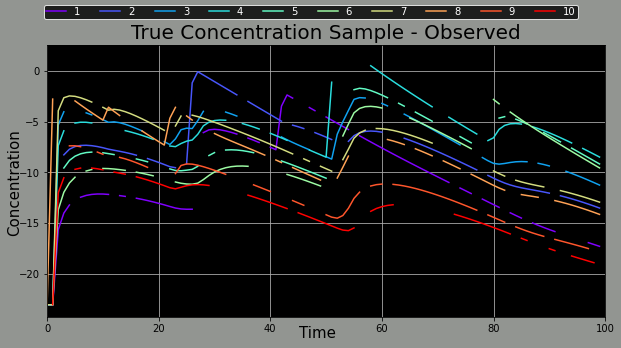

In [ ]:
plotResults(CArray*OArray, sites, length, "True Concentration Sample - Observed", "Concentration")

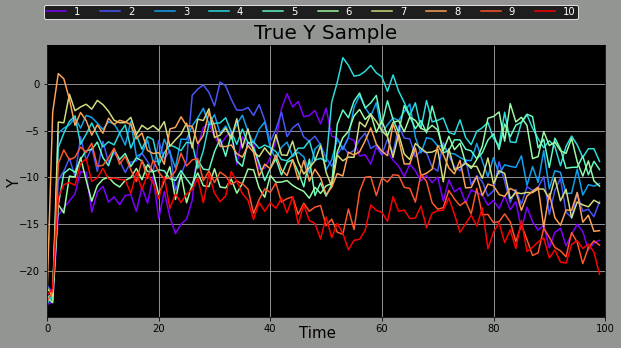

In [ ]:
#@title Plotting true Y Sample

plotResults(Y, sites, length, "True Y Sample", "Y")

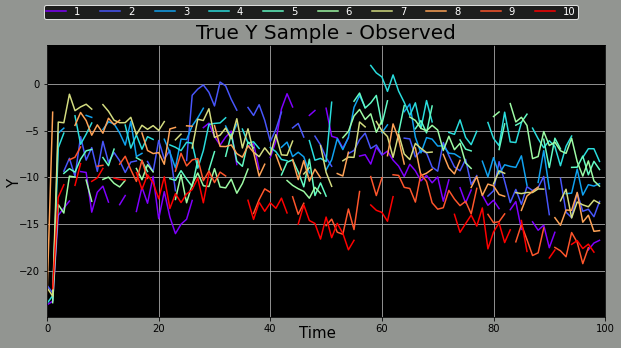

In [ ]:

plotResults(Y*OArray, sites, length, "True Y Sample - Observed", "Y")

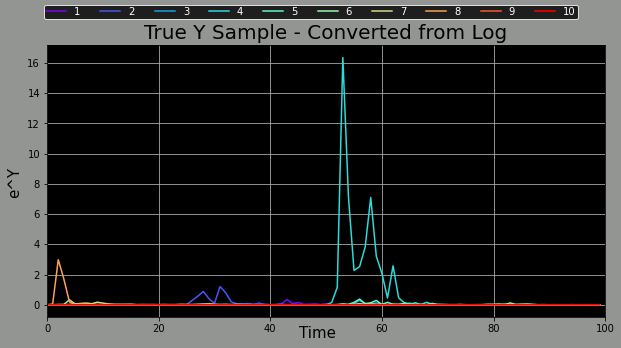

In [ ]:
#@title Plotting true Y sample - Converted from log
plotResults(np.e**Y, sites, length, "True Y Sample - Converted from Log", "e^Y")

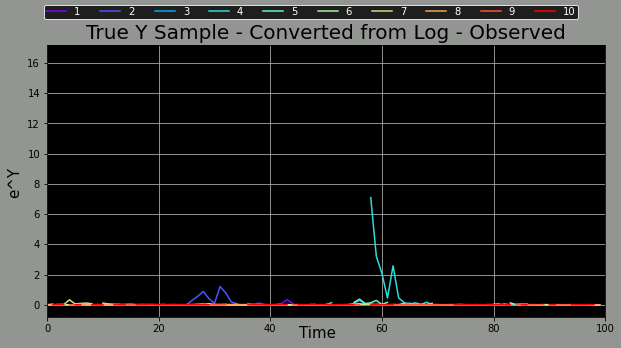

In [ ]:
plotResults((np.e**Y)*OArray, sites, length, "True Y Sample - Converted from Log - Observed", "e^Y")

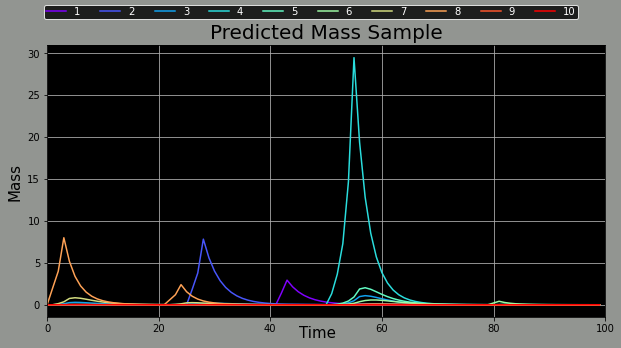

In [ ]:
#@title Plotting Mass sample determined from parameters
massSample = getSample(sites, length, pmat, np.mean(alphaArray), np.mean(betaArray), phi[2], 
                       [int(stats.mode(IArray[:, i])[0]) for i in range(phi[2])], [int(stats.mode(TArray[:, i])[0]) for i in range(phi[2])], 
                       [int(stats.mode(WArray[:, i])[0]) for i in range(phi[2])], [np.mean(SArray[:, i]) for i in range(phi[2])])

plotResults(massSample, sites, length, "Predicted Mass Sample", "Mass")

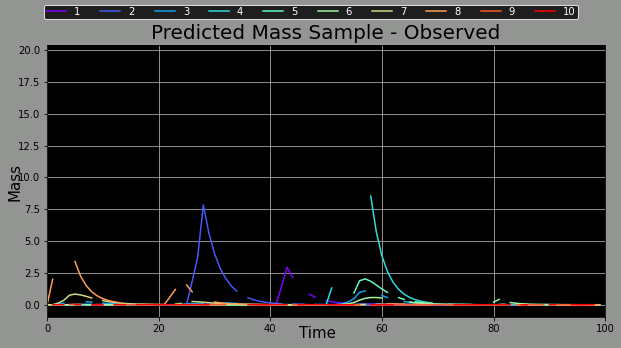

In [ ]:
plotResults(massSample*OArray, sites, length, "Predicted Mass Sample - Observed", "Mass")

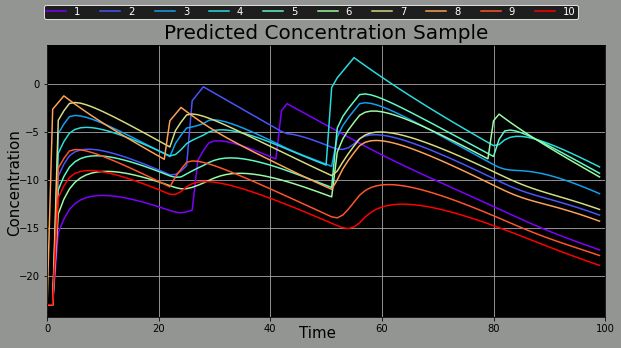

In [ ]:
#@title Plotting Concentration sample determined from parameters

concSample = convertConcentration(sites, length, massSample, V, delta)
ySample = convertY(concSample, 1/np.sqrt(np.mean(tauArray)))

plotResults(concSample, sites, length, "Predicted Concentration Sample", "Concentration")

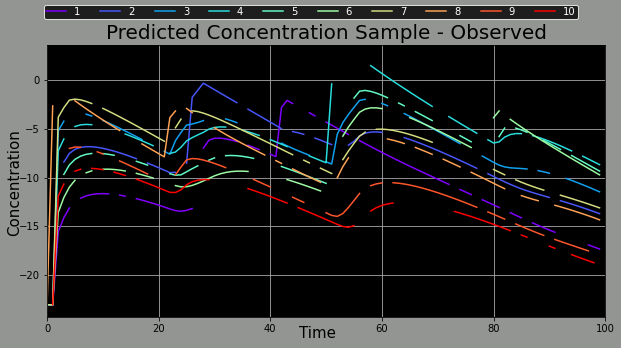

In [ ]:
plotResults(concSample*OArray, sites, length, "Predicted Concentration Sample - Observed", "Concentration")

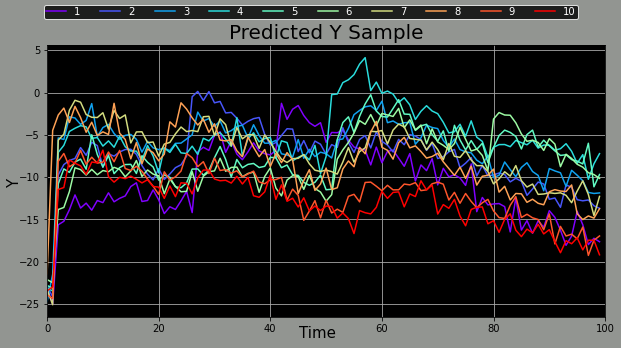

In [ ]:
#@title Plotting Y sample determined from parameters

plotResults(ySample, sites, length, "Predicted Y Sample", "Y")

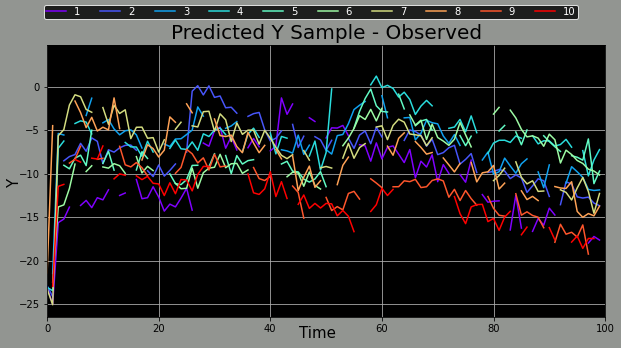

In [ ]:
plotResults(ySample*OArray, sites, length, "Predicted Y Sample - Observed", "Y")

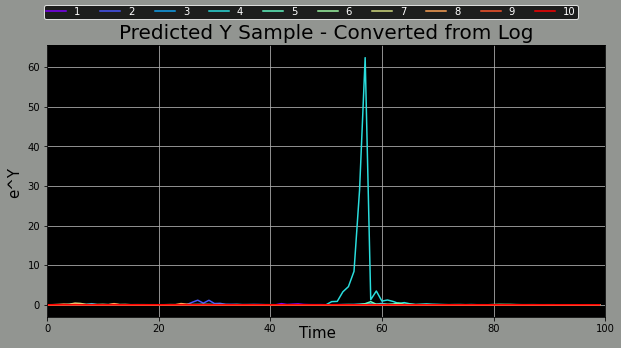

In [ ]:
#@title Plotting Y sample determined from parameters - converted from log
plotResults(np.e**ySample, sites, length, "Predicted Y Sample - Converted from Log", "e^Y")

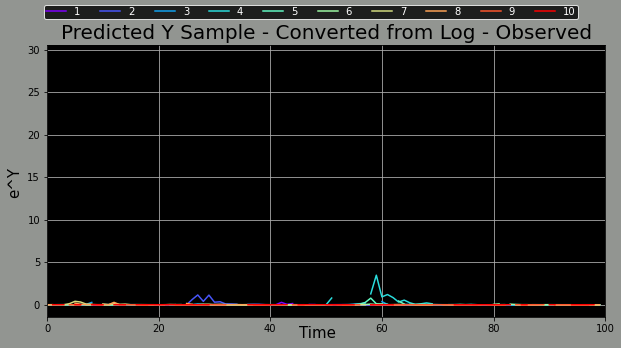

In [ ]:
#@title Plotting Y sample determined from parameters - converted from log
plotResults((np.e**ySample)*OArray, sites, length, "Predicted Y Sample - Converted from Log - Observed", "e^Y")

## Metrics

### DIC

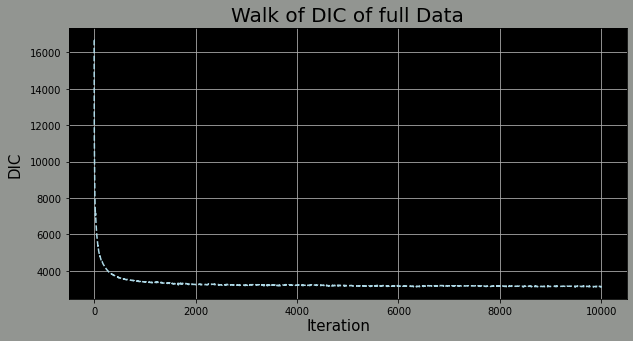

In [ ]:
#@title Walk of DIC for full data

plotDIC(DICFullArray, sites, length, "full Data")

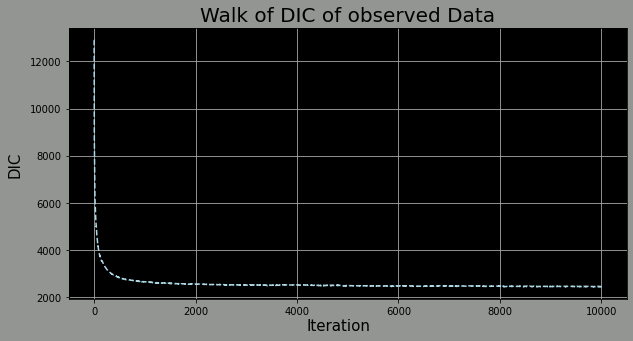

In [ ]:
#@title Walk of DIC for observed data

plotDIC(DICObservedArray, sites, length, "observed Data")

### Likelihood

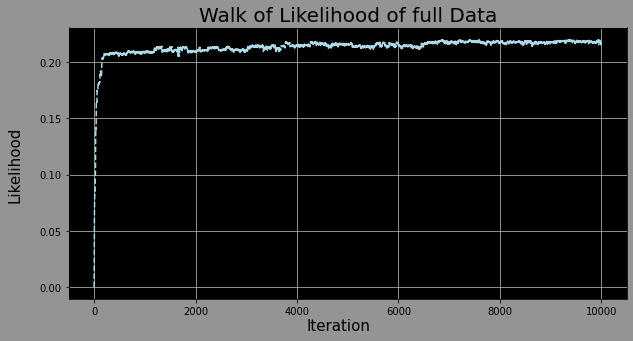

In [ ]:
#@title Walk of likelihood for full data

plotLikelihood(likelihoodFullArray, sites, length, "full Data")

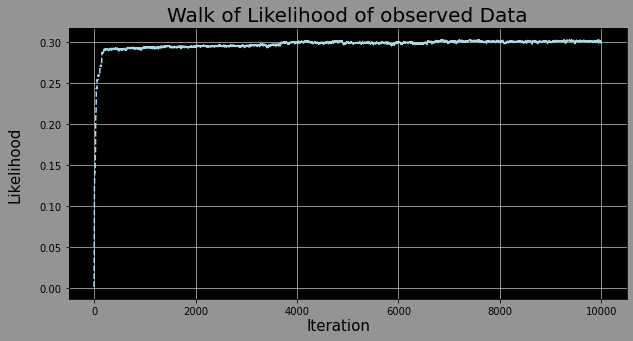

In [ ]:
#@title Walk of likelihood for observed data

plotLikelihood(likelihoodObservedArray, sites, length, "observed Data")

## Alpha

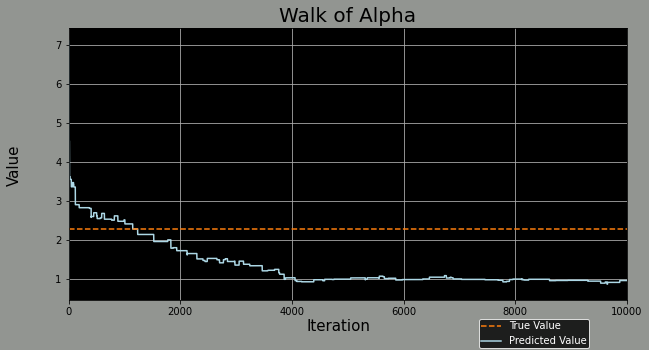

In [ ]:
#@title Walk

plotWalk(alphaArray, trueAlpha, "Alpha")


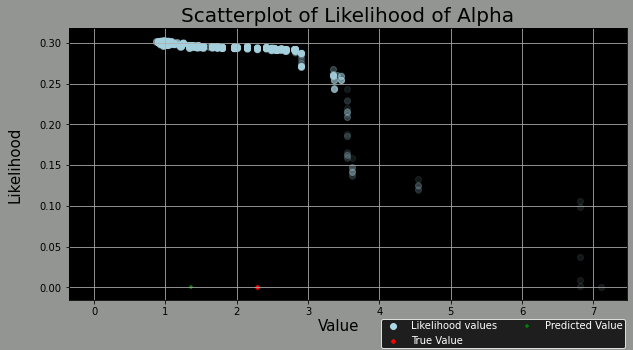

In [ ]:
#@title Scatterplot of likelihood

plotScatterLikelihood(alphaArray[1:S], alphaLikelihoodArray, sites, length, trueAlpha, "Alpha")

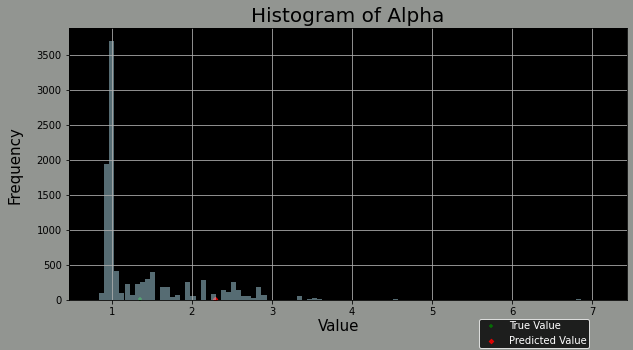

In [ ]:
#@title Histogram

plotHist(alphaArray, trueAlpha, "Alpha")

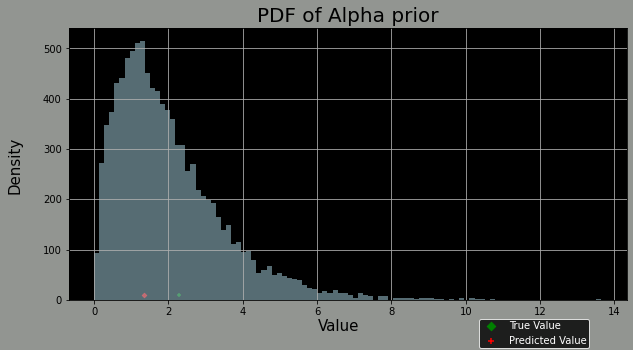

In [ ]:
#@title PDF of prior

plotPDF(alphaPrior, np.mean(alphaArray), trueAlpha, "Alpha")

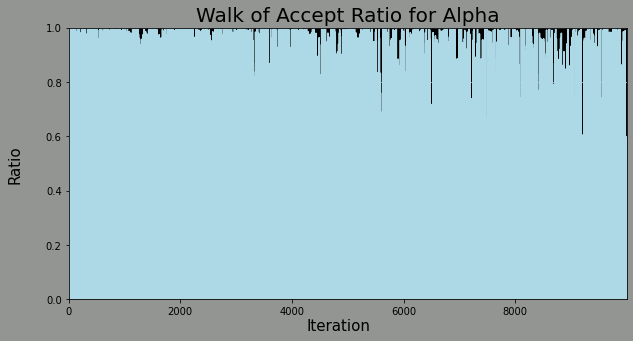

In [ ]:
#@title Walk of accept ratio

plotAcceptRatio(np.e**(alphaRatioArray/(sites*length)), "Alpha")

## Beta

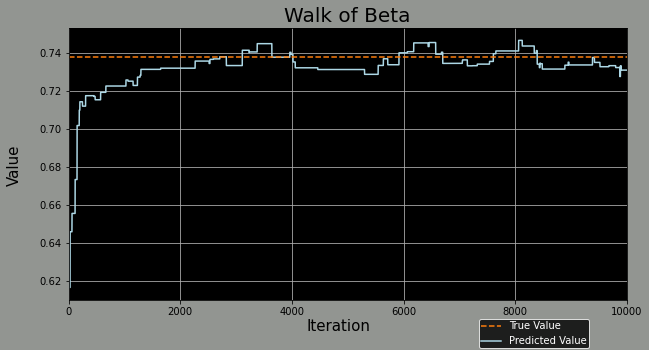

In [ ]:
#@title Walk

plotWalk(betaArray, trueBeta, "Beta")

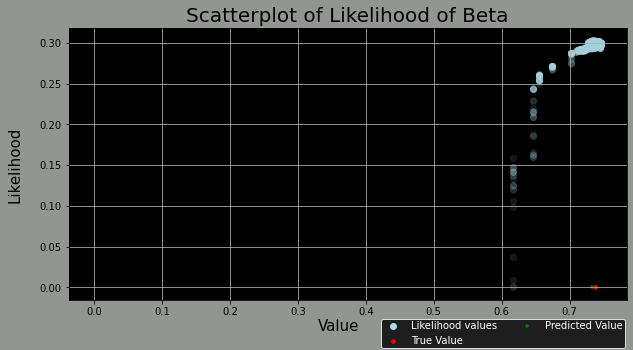

In [ ]:
#@title Scatterplot of likelihood

plotScatterLikelihood(betaArray[1:S], betaLikelihoodArray, sites, length, trueBeta, "Beta")

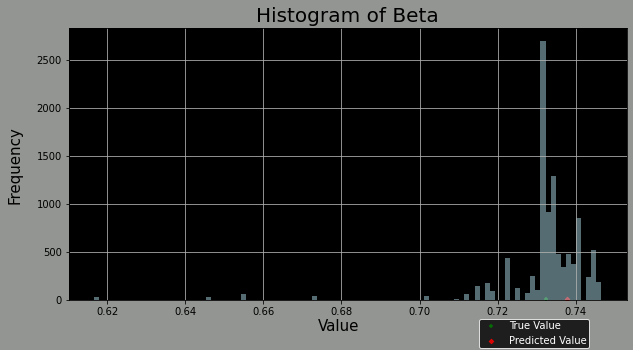

In [ ]:
#@title Histogram

plotHist(betaArray, trueBeta, "Beta")

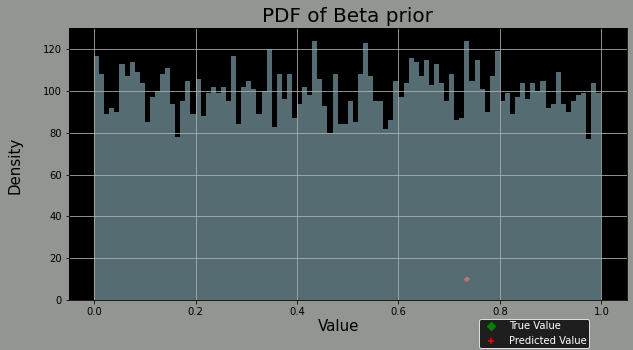

In [ ]:
#@title PDF of prior
plotPDF(betaPrior, np.mean(betaArray), trueBeta, "Beta")

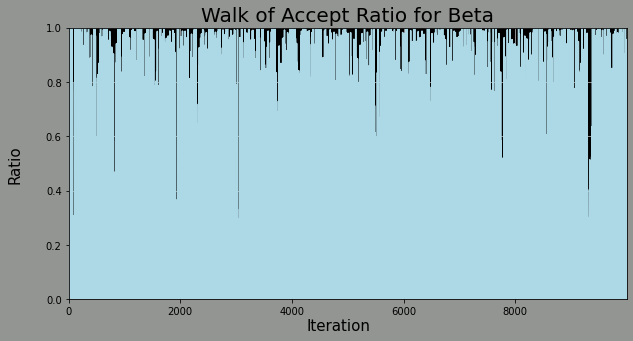

In [ ]:
#@title Walk of accept ratio

plotAcceptRatio(np.e**(betaRatioArray/(sites*length)), "Beta")

## Tau

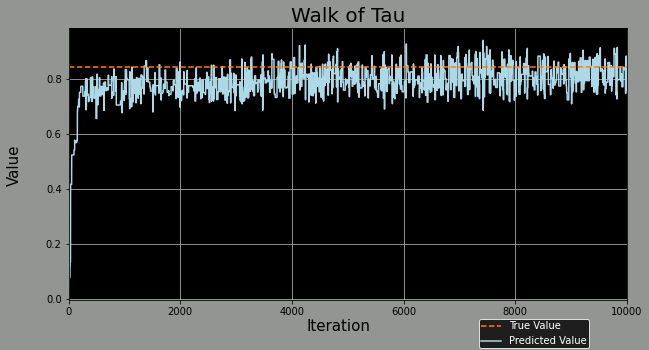

In [ ]:
#@title Walk

plotWalk(tauArray, trueTau, "Tau")

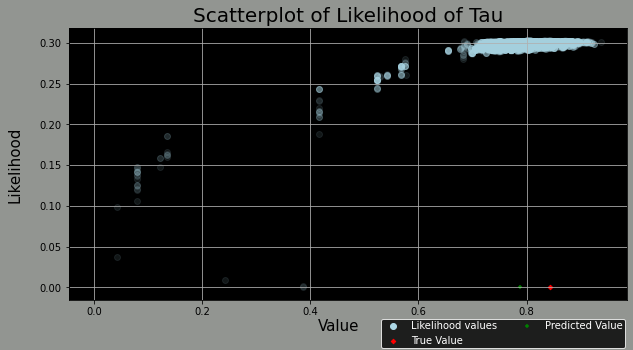

In [ ]:
#@title Scatterplot of likelihood

plotScatterLikelihood(tauArray[1:S], alphaLikelihoodArray, sites, length, trueTau, "Tau")

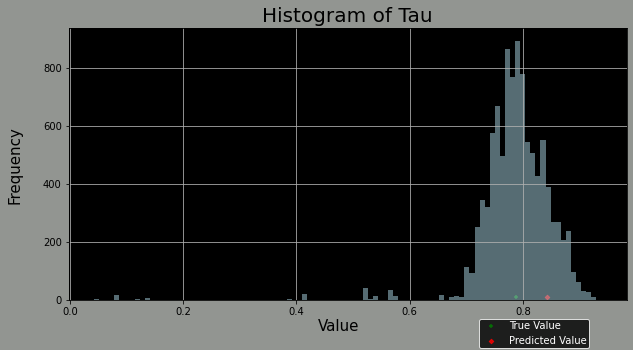

In [ ]:
#@title Histogram

#@title Histogram

plotHist(tauArray, trueTau, "Tau")

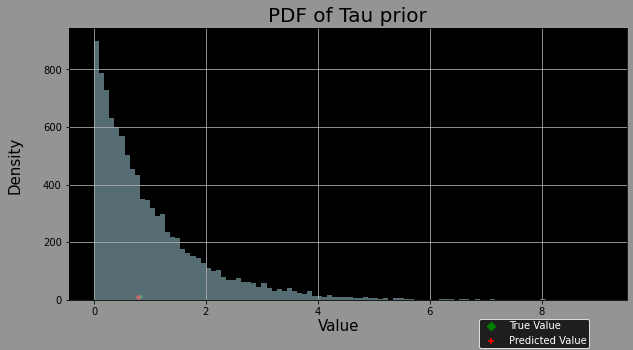

In [ ]:
#@title PDF of prior

plotPDF(tauPrior, np.mean(tauArray[:S]), trueTau, "Tau")

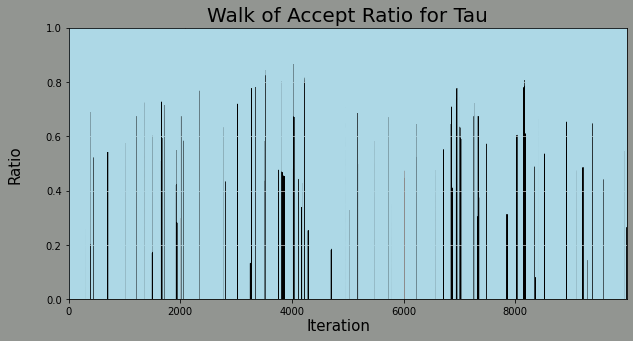

In [ ]:
#@title Walk of accept ratio

plotAcceptRatio(np.e**(tauRatioArray/(sites*length)), "Tau")

## T

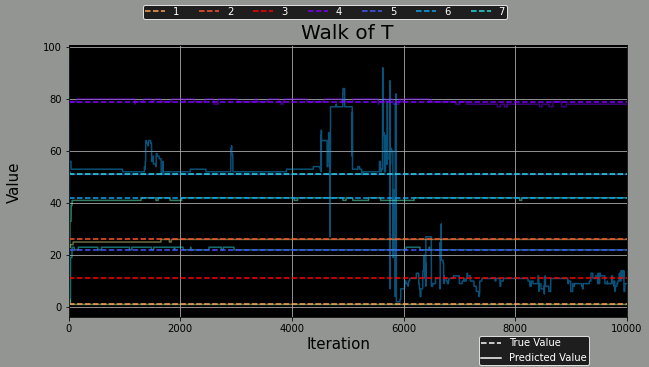

In [ ]:
#@title Walk

plotWalkSet(TArray, trueT, phi[2], "T")

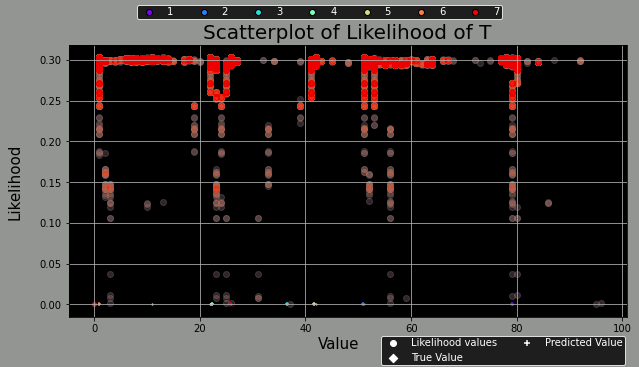

In [ ]:
#@title Scatterplot of likelihood

plotScatterLikelihoodSet(TArray[1:S, :], TLikelihoodArray, sites, length, trueT, phi[2], "T")

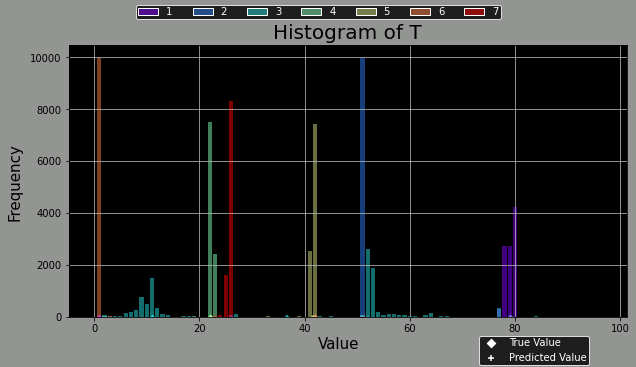

In [ ]:
#@title Histogram

plotHistSetDiscrete(TArray, trueT, phi[2], "T")

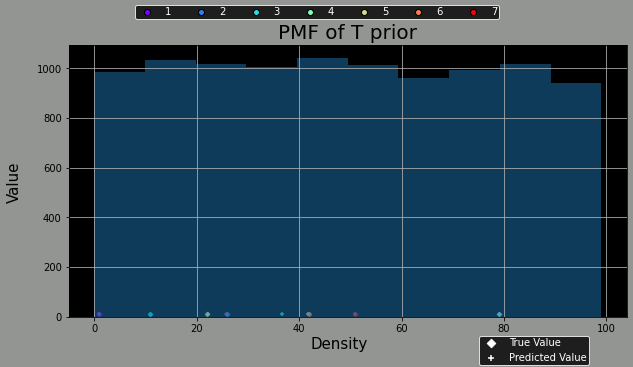

In [ ]:
#@title PMF of Prior

plotPMFSet(TPrior, [np.mean(TArray[:, i]) for i in range(phi[2])], trueT, phi[2], "T")

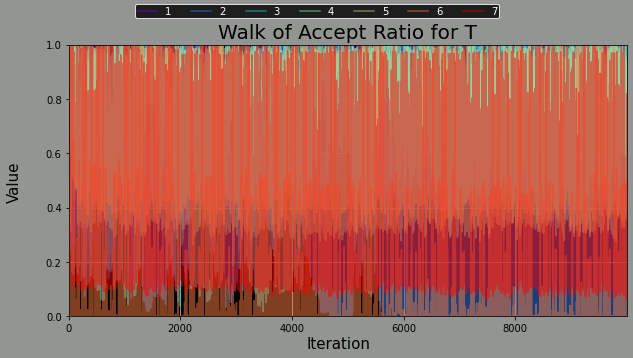

In [ ]:
#@title Walk of accept ratio
plotAcceptRatioSet(np.e**(TRatioArray/(sites*length)), phi[2], "T")

## W

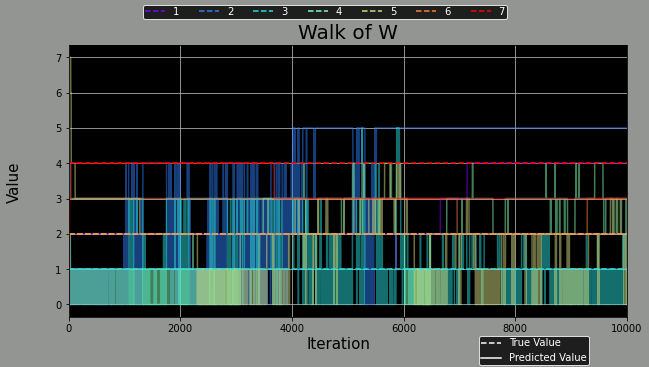

In [ ]:
#@title Walk

plotWalkSet(WArray, trueW, phi[2], "W")

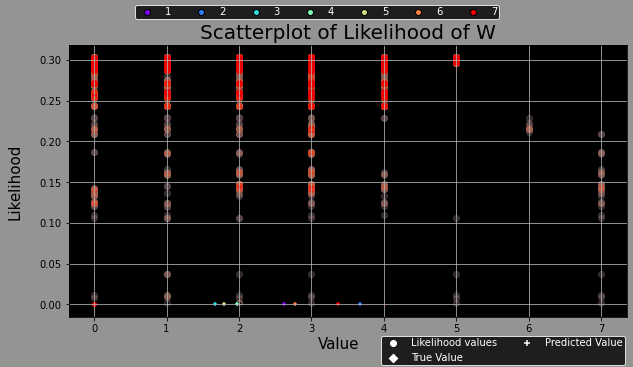

In [ ]:
#@title Scatterplot of likelihood

plotScatterLikelihoodSet(WArray[1:S, :], WLikelihoodArray, sites, length, trueW, phi[2], "W")

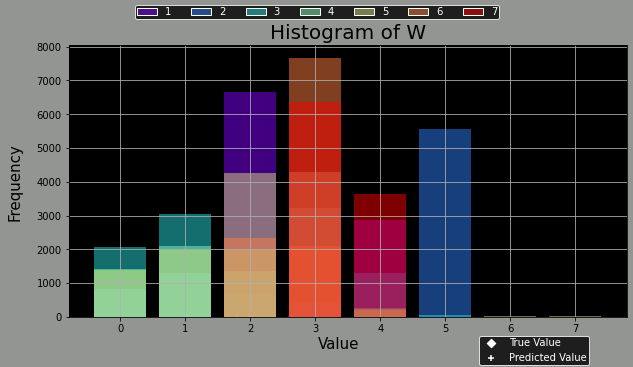

In [ ]:
#@title Histogram
plotHistSetDiscrete(WArray, trueW, phi[2], "W")

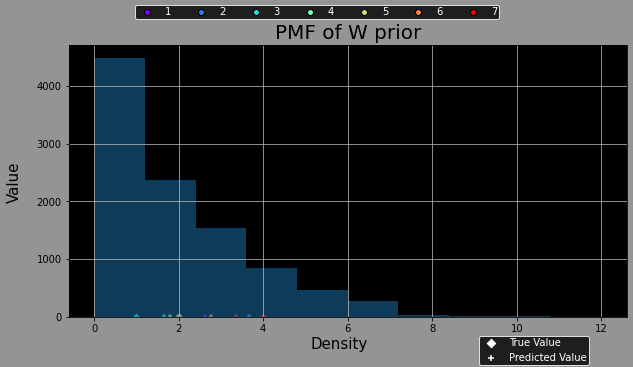

In [ ]:
#@title PMF of Prior
plotPMFSet(WPrior, [np.mean(WArray[:, i]) for i in range(phi[2])], trueW, phi[2], "W")

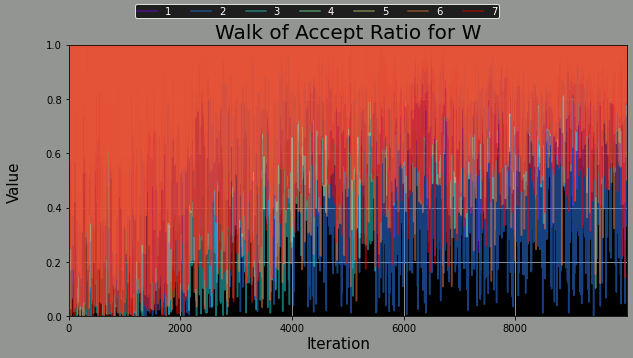

In [ ]:
#@title Walk of accept ratio
plotAcceptRatioSet(np.e**(WRatioArray/(sites*length)), phi[2], "W")

## S


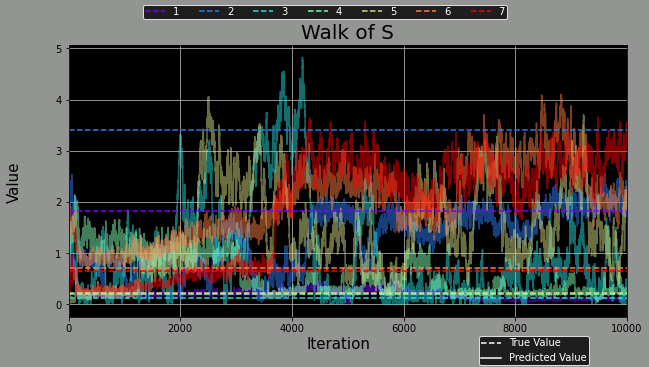

In [ ]:
#@title Walk
plotWalkSet(SArray, trueS, phi[2], "S")

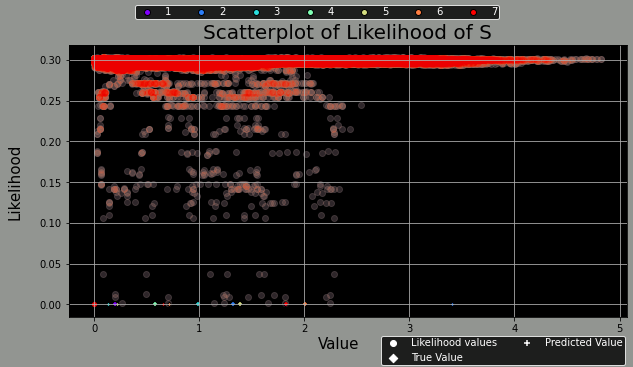

In [ ]:
#@title Scatterplot of likelihood
plotScatterLikelihoodSet(SArray[1:S, :], SLikelihoodArray, sites, length, trueS, phi[2], "S")

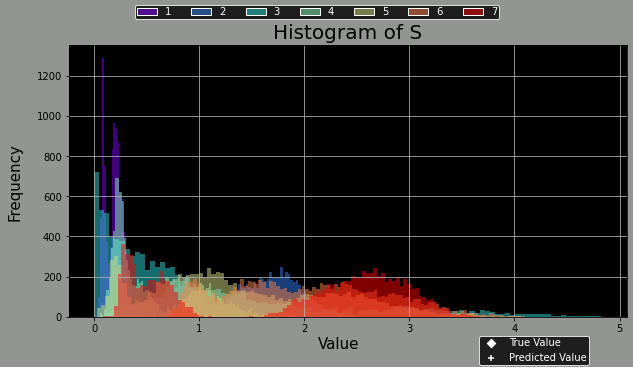

In [ ]:
#@title Histogram

plotHistSet(SArray, trueS, phi[2], "S")

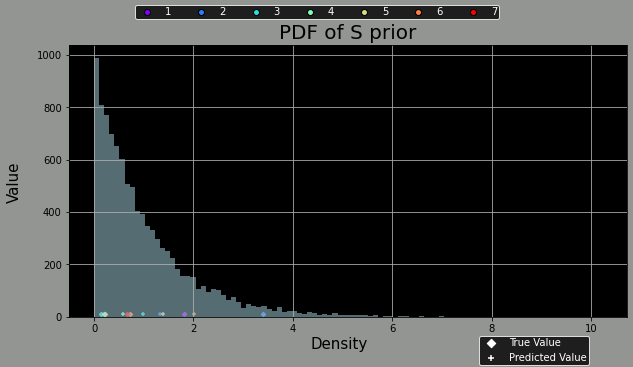

In [ ]:
#@title PDF of Prior
plotPDFSet(SPrior, [np.mean(SArray[:, i]) for i in range(phi[2])], trueS, phi[2], "S")

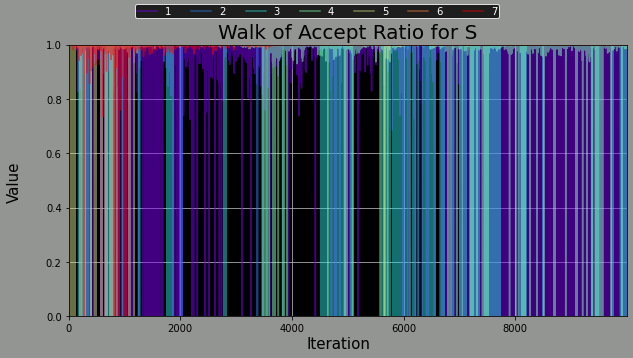

In [ ]:
#@title Walk of accept ratio
plotAcceptRatioSet(np.e**(SRatioArray/(sites*length)), phi[2], "S")

## I

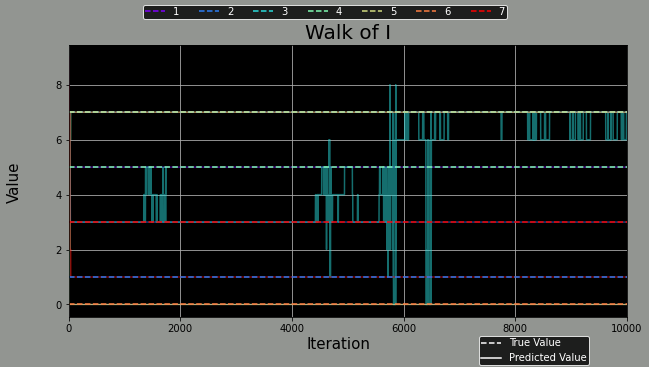

In [ ]:
#@title Walk
plotWalkSet(IArray, trueI, phi[2], "I")

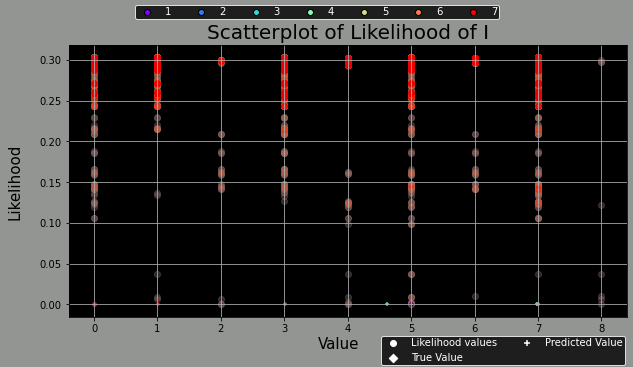

In [ ]:
#@title Scatterplot of likelihood
plotScatterLikelihoodSet(IArray[1:S, :], ILikelihoodArray, sites, length, trueI, phi[2], "I")

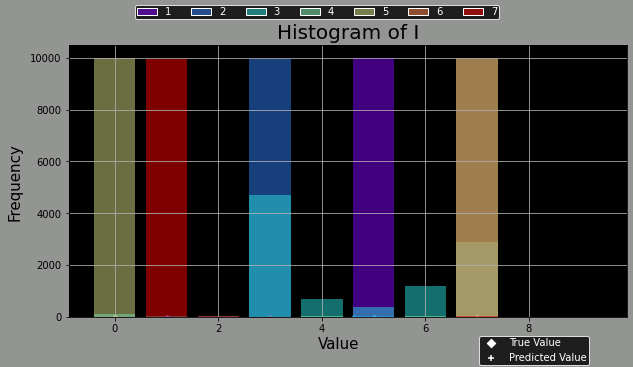

In [ ]:
#@title Histogram
plotHistSetDiscrete(IArray, trueI, phi[2], "I")

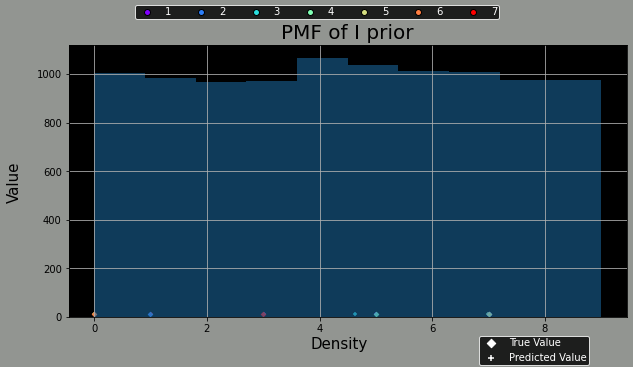

In [ ]:
#@title PMF of Prior
plotPMFSet(IPrior, [np.mean(IArray[:, i]) for i in range(phi[2])], trueI, phi[2], "I")

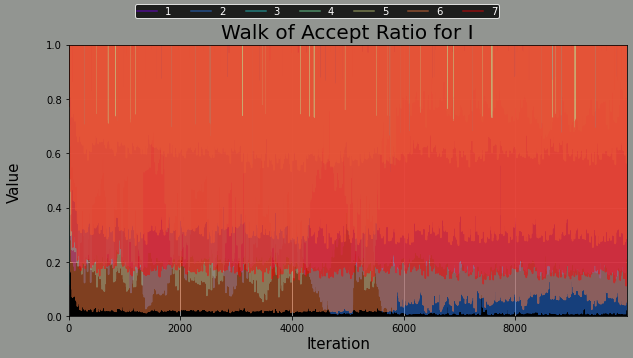

In [ ]:
#@title Walk of accept ratio
plotAcceptRatioSet(np.e**(IRatioArray/(sites*length)), phi[2], "I")